In [396]:
import random
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Introduction

TODO: Explain why do dis

# Load dataset

We will use the diabetes dataset from `sklearn.datasets`, which you can read about in the scikit-learn documentation at https://scikit-learn.org/stable/datasets/index.html. To keep it as simple as possible we will only use one independent variable (the BMI of the patient which is the 3rd feature). Note from the documentation: *Each of these 10 feature variables have been mean centered and scaled by the standard deviation times n_samples (i.e. the sum of squares of each column totals 1).*

In [397]:
X_diabetes, Y_diabetes = datasets.load_diabetes(return_X_y=True)

In [398]:
X_diabetes.shape

(442, 10)

In [399]:
Y_diabetes = np.expand_dims(Y_diabetes, axis=1)
Y_diabetes.shape

(442, 1)

In [400]:
X_diabetes = np.expand_dims(X_diabetes[:, 2], axis=1)
X_diabetes.shape

(442, 1)

## Split into training and test sets

In [413]:
X_train, X_test, Y_train, Y_test = train_test_split(X_diabetes, Y_diabetes, test_size=1/3, random_state=42)
print(f'X_train.shape={X_train.shape} X_test.shape={X_test.shape} Y_train.shape={Y_train.shape} Y_test.shape={Y_test.shape}')

X_train.shape=(294, 1) X_test.shape=(148, 1) Y_train.shape=(294, 1) Y_test.shape=(148, 1)


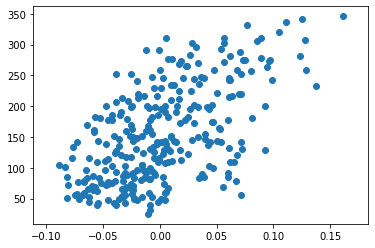

In [414]:
plt.scatter(X_train, Y_train)

# Linear regression using scikit-learn

In [415]:
lr = LinearRegression()
lr.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [416]:
Y_pred = lr.predict(X_test)
Y_pred.shape

(148, 1)

In [417]:
print('Coefficients:', lr.coef_)
print('Mean squared error (MSE):', mean_squared_error(Y_test, Y_pred))
print('Coefficient of determination (R^2):', r2_score(Y_test, Y_pred))

Coefficients: [[975.40444663]]
Mean squared error (MSE): 3891.300416804684
Coefficient of determination (R^2): 0.3158755200403638


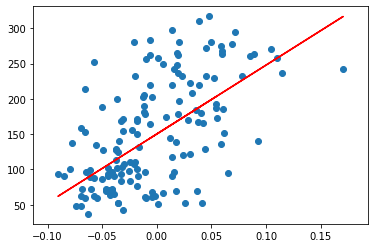

In [418]:
plt.scatter(X_test, Y_test)
plt.plot(X_test, Y_pred, color='red')
plt.show()

# Linear regression using PyTorch

# Linear regression using TensorFlow 2